## Task
For this week's workshop, you will explore different parameters for the algorithms you have been taught for Regression (Multiple Linear Regression, Support Vector Regression, Decision Tree Regression and Random Forest Regression). Each algorithm has different parameters that you can add and tweak to improve the accuracy. Use the following links and add every parameter to your model functions:

- SVR
- DTR
- RFR

Set each parameter to the default value (found in the documentation). Start modifying these values based on the descriptions given and write a short description in your own words as to why the accuracy did or did not change. It is up to you how many you want to try but pick at least three parameters. This will also help your portfolio submission as you are exploring ways of improving your model!

Once finished, you should submit your file. If you have multiple Python program files, zip them up and submit as a single file. It would be useful to us if you could write a comment with your submission which questions you struggled on (if any) so we can provide feedback quicker.

Further reading - Chapter 4 (Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools and Techniques to Build Intelligent Systems).

### Grading
This assignment is not graded; however, you will receive feedback on your work that will help you develop knowledge and skills that you need in order to be successful in your assessments.

#### Finally we shall use decision tree regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dtr = pd.read_csv('ParisHousing.csv')

In [3]:
df_dtr.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
df_dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df_dtr.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


### Feature Engineering

In [6]:
df_dtr.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [7]:
df_dtr.drop(['numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic',
       'hasStorageRoom', 'hasGuestRoom'], axis=1, inplace=True)

In [8]:
df_dtr.head()

,squareMeters,garage,price
0,75523,956,7559081.5
1,80771,128,8085989.5
2,55712,135,5574642.1
3,32316,359,3232561.2
4,70429,292,7055052.0


#### Splitting the data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_dtr.drop('price', axis=1))
scaled_features = scaler.transform(df_dtr.drop('price', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df_dtr.columns[:-1])
df_feat.head()

,squareMeters,garage
0,0.891562,1.537488
1,1.073956,-1.622370
2,0.203033,-1.595657
3,-0.610092,-0.740816
4,0.714521,-0.996505


In [10]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df_dtr['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [12]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
predictions = dtr.predict(X_test)

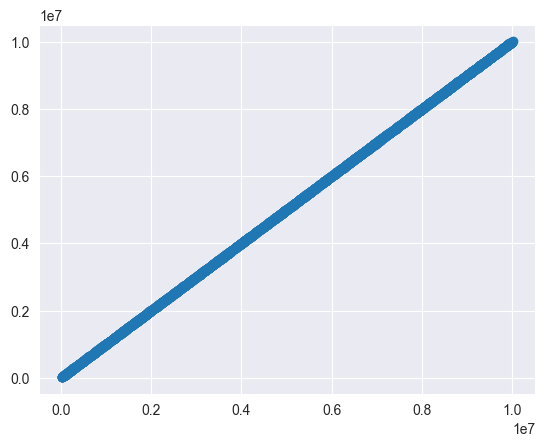

In [14]:
plt.scatter(y_test, predictions)

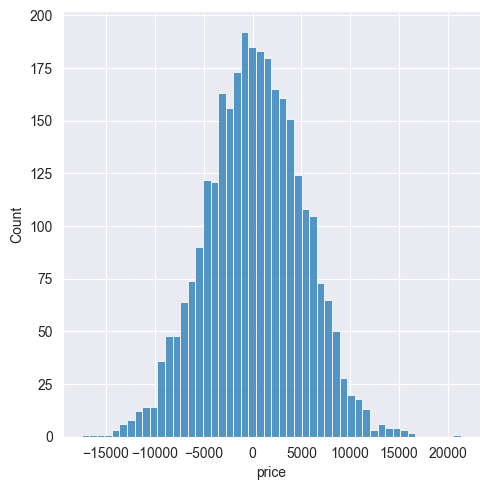

In [15]:
sns.displot((y_test-predictions), bins=50)

In [16]:
from sklearn import metrics

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 3951.455433333343


In [18]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 24475617.90709007


In [19]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 4947.283891903725


In [20]:
metrics.explained_variance_score(y_test, predictions)

0.9999970519828839

In [21]:
metrics.r2_score(y_test, predictions)

0.9999970460919115

In [22]:
metrics.max_error(y_test, predictions)

21331.200000000186